# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


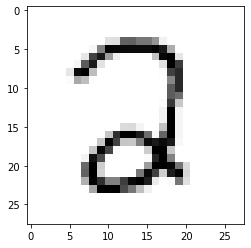

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2523
Training Accuracy: 0.5122, Testing Accuracy: 0.5121



Epoch 10, Loss 0.206
Training Accuracy: 0.8039, Testing Accuracy: 0.7923



Epoch 20, Loss 0.122
Training Accuracy: 0.8903, Testing Accuracy: 0.8906



Epoch 30, Loss 0.0733
Training Accuracy: 0.9230, Testing Accuracy: 0.9340



Epoch 40, Loss 0.0536
Training Accuracy: 0.9421, Testing Accuracy: 0.9536



Epoch 50, Loss 0.044
Training Accuracy: 0.9519, Testing Accuracy: 0.9612



Epoch 60, Loss 0.0386
Training Accuracy: 0.9565, Testing Accuracy: 0.9652



Epoch 70, Loss 0.0351
Training Accuracy: 0.9599, Testing Accuracy: 0.9682



Epoch 80, Loss 0.0327
Training Accuracy: 0.9631, Testing Accuracy: 0.9688



Epoch 90, Loss 0.0309
Training Accuracy: 0.9652, Testing Accuracy: 0.9677



Epoch 100, Loss 0.0295
Training Accuracy: 0.9663, Testing Accuracy: 0.9682



Epoch 110, Loss 0.0284
Training Accuracy: 0.9675, Testing Accuracy: 0.9693



Epoch 120, Loss 0.0274
Training Accuracy: 0.9682, Testing Accuracy: 0.9698



Epoch 130, Loss 0.0265
Training Accuracy: 0.9687, Testing Accuracy: 0.9703



Epoch 140, Loss 0.0258
Training Accuracy: 0.9700, Testing Accuracy: 0.9703



Epoch 150, Loss 0.0251
Training Accuracy: 0.9708, Testing Accuracy: 0.9708



Epoch 160, Loss 0.0245
Training Accuracy: 0.9720, Testing Accuracy: 0.9708



Epoch 170, Loss 0.0239
Training Accuracy: 0.9730, Testing Accuracy: 0.9713



Epoch 180, Loss 0.0234
Training Accuracy: 0.9731, Testing Accuracy: 0.9728



Epoch 190, Loss 0.0229
Training Accuracy: 0.9740, Testing Accuracy: 0.9728



Epoch 200, Loss 0.0224
Training Accuracy: 0.9744, Testing Accuracy: 0.9733



Epoch 210, Loss 0.022
Training Accuracy: 0.9750, Testing Accuracy: 0.9723



Epoch 220, Loss 0.0216
Training Accuracy: 0.9755, Testing Accuracy: 0.9728



Epoch 230, Loss 0.0212
Training Accuracy: 0.9760, Testing Accuracy: 0.9723



Epoch 240, Loss 0.0208
Training Accuracy: 0.9765, Testing Accuracy: 0.9723



0.002242652172787244

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2603
Training Accuracy: 0.6032, Testing Accuracy: 0.6245



Epoch 10, Loss 0.104
Training Accuracy: 0.9052, Testing Accuracy: 0.9123



Epoch 20, Loss 0.0789
Training Accuracy: 0.9275, Testing Accuracy: 0.9320



Epoch 30, Loss 0.0675
Training Accuracy: 0.9369, Testing Accuracy: 0.9435



Epoch 40, Loss 0.0608
Training Accuracy: 0.9436, Testing Accuracy: 0.9506



Epoch 50, Loss 0.0563
Training Accuracy: 0.9463, Testing Accuracy: 0.9546



Epoch 60, Loss 0.053
Training Accuracy: 0.9488, Testing Accuracy: 0.9567



Epoch 70, Loss 0.0505
Training Accuracy: 0.9503, Testing Accuracy: 0.9602



Epoch 80, Loss 0.0484
Training Accuracy: 0.9519, Testing Accuracy: 0.9617



Epoch 90, Loss 0.0468
Training Accuracy: 0.9531, Testing Accuracy: 0.9637



Epoch 100, Loss 0.0454
Training Accuracy: 0.9545, Testing Accuracy: 0.9642



Epoch 110, Loss 0.0442
Training Accuracy: 0.9559, Testing Accuracy: 0.9647



Epoch 120, Loss 0.0432
Training Accuracy: 0.9567, Testing Accuracy: 0.9647



Epoch 130, Loss 0.0423
Training Accuracy: 0.9569, Testing Accuracy: 0.9652



Epoch 140, Loss 0.0415
Training Accuracy: 0.9572, Testing Accuracy: 0.9657



Epoch 150, Loss 0.0408
Training Accuracy: 0.9580, Testing Accuracy: 0.9662



Epoch 160, Loss 0.0401
Training Accuracy: 0.9586, Testing Accuracy: 0.9662



Epoch 170, Loss 0.0395
Training Accuracy: 0.9590, Testing Accuracy: 0.9667



Epoch 180, Loss 0.039
Training Accuracy: 0.9593, Testing Accuracy: 0.9672



Epoch 190, Loss 0.0385
Training Accuracy: 0.9594, Testing Accuracy: 0.9672



Epoch 200, Loss 0.038
Training Accuracy: 0.9599, Testing Accuracy: 0.9672



Epoch 210, Loss 0.0376
Training Accuracy: 0.9601, Testing Accuracy: 0.9672



Epoch 220, Loss 0.0372
Training Accuracy: 0.9604, Testing Accuracy: 0.9682



Epoch 230, Loss 0.0368
Training Accuracy: 0.9607, Testing Accuracy: 0.9677



Epoch 240, Loss 0.0365
Training Accuracy: 0.9609, Testing Accuracy: 0.9677



0.03994272783942905

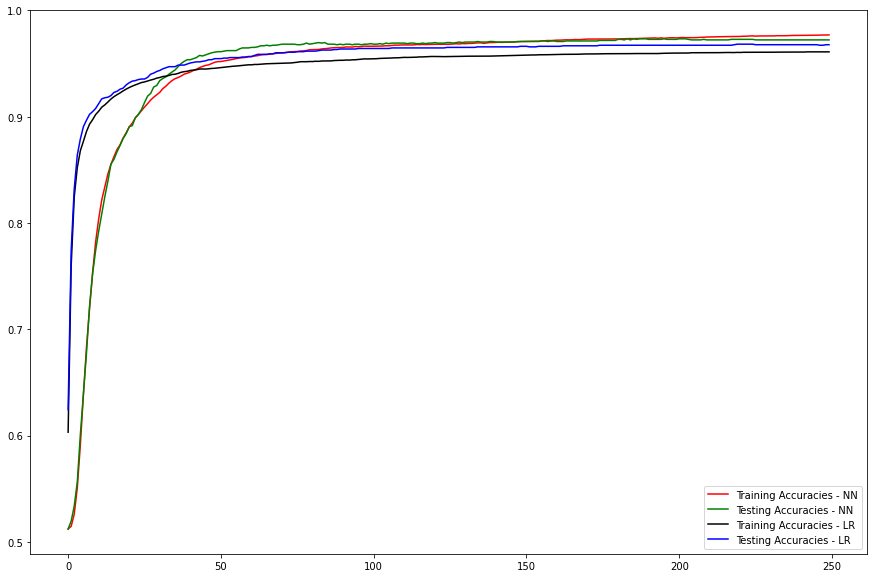

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

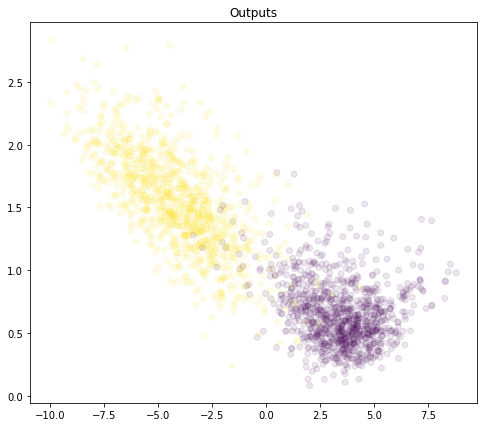

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

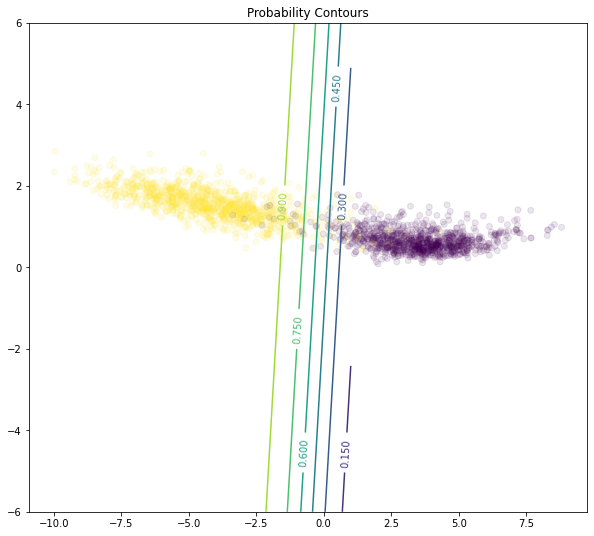

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );